In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [4]:
df1=pd.read_csv('cleaned_listing.csv',index_col=0)
df2=pd.read_csv('scored_reviews.csv',index_col=0)

In [5]:
df1.head()

,id,description,host_id,host_since,host_location,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,description_type,list_amenities,washer,Laptop friendly workspace,TV,Refrigerator,amenities_count
0,2015,Great location! 30 of 75 sq meters. This wood...,2217,2008-08-18,"Key Biscayne, Florida, United States",t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Mitte,...,f,f,4,0,"['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Gym', '...",False,True,True,True,29
1,2695,In the summertime we are spending most of our ...,2986,2008-09-16,"Berlin, Berlin, Germany",f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Pankow,...,f,f,1,0,"['Wifi', 'Kitchen', 'Elevator', 'Heating', 'Wa...",True,True,False,False,10
2,3176,This beautiful first floor apartment is situa...,3718,2008-10-19,"Coledale, New South Wales, Australia",f,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,Pankow,...,f,f,1,0,"['Internet', 'Wifi', 'Kitchen', 'Buzzer/wirele...",True,True,False,False,19
3,3309,First of all: I prefer short-notice bookings. ...,4108,2008-11-07,"Berlin, Berlin, Germany",f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Tempelhof - Schöneberg,...,f,f,1,3,"['Internet', 'Wifi', 'Pets allowed', 'Pets liv...",True,True,False,False,29
4,7071,Cozy and large room in the beautiful district ...,17391,2009-05-16,"Berlin, Berlin, Germany",t,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Pankow,...,f,f,1,0,"['Wifi', 'Heating', 'Family/kid friendly', 'Es...",False,True,False,False,13


In [6]:
df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,positive,negative,score
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,0.023,0.122,-0.8930
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,0.495,0.000,0.9703
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...,0.000,0.033,-0.1280
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",0.470,0.000,0.7955
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden...",0.000,0.082,-0.5267


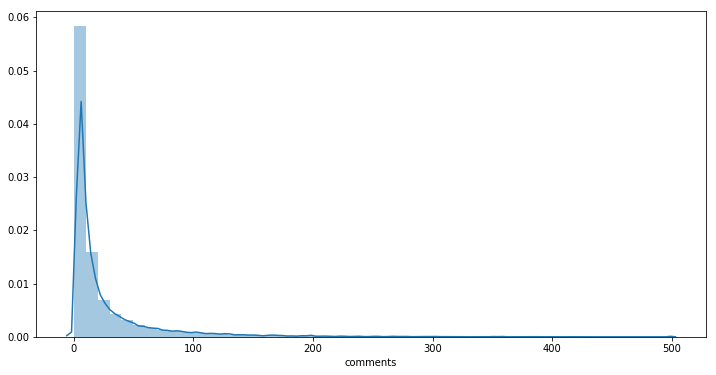

In [7]:
fig=plt.figure(figsize=(12,6))
sns.distplot(df2.groupby(['listing_id']).count()['comments'].sort_values())

In [8]:
df3=df2.groupby(['listing_id']).mean()[['positive','negative','score']]

In [9]:
df3=df3.reset_index()

In [10]:
df=df1.merge(df3,how='left',left_on='id',right_on='listing_id')

In [11]:
df.shape


(22552, 50)

In [12]:
df.columns

Index(['id', 'description', 'host_id', 'host_since', 'host_location',
       'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'requires_license',
       'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'description_type', 'list_amenities',
       'washer', 'Laptop friendly workspace', 'TV', 'Refrigerator',
       'amenities_count', 'listing_id', 'positive', 'negative', 'score'],
      dtype='object')

In [13]:
df.describe()

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,...,availability_90,availability_365,number_of_reviews,calculated_host_listings_count,description_type,amenities_count,listing_id,positive,negative,score
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22520.000000,22534.000000,22512.000000,22552.000000,22552.000000,...,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,1.863800e+04,18638.000000,18638.000000,18638.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,2.637460,1.092695,1.161134,1.620558,1.332121,7.157059,...,20.016096,79.852829,17.840679,1.918233,1.431048,16.117240,1.527258e+07,0.246480,0.035937,0.479368
std,8.552069e+06,5.816290e+07,0.030825,0.057964,1.510548,0.329894,0.646156,1.174840,0.835034,40.665073,...,28.349136,119.368162,36.769624,3.667257,1.125900,8.928438,8.454617e+06,0.119210,0.045400,0.350348
min,2.015000e+03,2.217000e+03,52.345803,13.103557,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.015000e+03,0.000000,0.000000,-0.996500
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,10.000000,7.792106e+06,0.183853,0.003333,0.308509
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,4.000000,5.000000,1.000000,1.000000,14.000000,1.642057e+07,0.250387,0.025333,0.525280
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,3.000000,1.000000,1.000000,2.000000,1.000000,4.000000,...,36.000000,129.000000,16.000000,1.000000,2.000000,20.000000,2.217936e+07,0.308899,0.048850,0.715427
max,2.986735e+07,2.245081e+08,52.651670,13.757642,16.000000,8.500000,12.000000,22.000000,16.000000,5000.000000,...,90.000000,365.000000,498.000000,45.000000,3.000000,71.000000,2.984956e+07,1.000000,0.661000,0.998400


In [14]:
df.nunique()

id                                  22552
description                         21997
host_id                             19180
host_since                           2914
host_location                        1036
host_is_superhost                       2
host_verifications                    301
host_has_profile_pic                    2
host_identity_verified                  2
neighbourhood_group_cleansed           12
zipcode                               215
latitude                            22552
longitude                           22552
is_location_exact                       2
property_type                          33
room_type                               3
accommodates                           16
bathrooms                              16
bedrooms                               12
beds                                   18
bed_type                                5
amenities                           19985
price                                 295
guests_included                   

In [15]:
df=df.drop(['description','host_since','host_location','host_verifications','latitude','zipcode','longitude','amenities','calendar_updated','list_amenities','listing_id'],axis=1)

In [16]:
df.isna().sum(axis=0)

id                                     0
host_id                                0
host_is_superhost                     26
host_has_profile_pic                  26
host_identity_verified                26
neighbourhood_group_cleansed           0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                             32
bedrooms                              18
beds                                  40
bed_type                               0
price                                  0
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365                       0
number_of_reviews                      0
requires_license

In [17]:
df=df.fillna(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 39 columns):
id                                  22552 non-null int64
host_id                             22552 non-null int64
host_is_superhost                   22552 non-null object
host_has_profile_pic                22552 non-null object
host_identity_verified              22552 non-null object
neighbourhood_group_cleansed        22552 non-null object
is_location_exact                   22552 non-null object
property_type                       22552 non-null object
room_type                           22552 non-null object
accommodates                        22552 non-null int64
bathrooms                           22552 non-null float64
bedrooms                            22552 non-null float64
beds                                22552 non-null float64
bed_type                            22552 non-null object
price                               22552 non-null object
guests_included      

In [19]:
def convert0_1(i):
    df[i]=df[i].map({'t':1,'f':0})
for i in ['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact',\
          'requires_license','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']:
    convert0_1(i)

In [20]:
df['price']=df['price'].str.replace(',','').str.lstrip('$').astype(float)
df['extra_people']=df['extra_people'].str.replace(',','').str.lstrip('$').astype(float)

In [21]:
df.iloc[:20,20:]

,availability_60,availability_90,availability_365,number_of_reviews,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,description_type,washer,Laptop friendly workspace,TV,Refrigerator,amenities_count,positive,negative,score
0,21,51,141,118,1,0,strict_14_with_grace_period,0,0,4,0,False,True,True,True,29,0.279839,0.039686,0.472424
1,0,0,0,6,1,0,flexible,0,0,1,0,True,True,False,False,10,0.343000,0.016333,0.891517
2,0,0,220,143,1,1,strict_14_with_grace_period,0,0,1,0,True,True,False,False,19,0.287385,0.020063,0.783873
3,0,22,297,25,1,0,strict_14_with_grace_period,0,0,1,3,True,True,False,False,29,0.204320,0.042760,0.449568
4,26,26,26,197,1,0,moderate,0,0,1,0,False,True,False,False,13,0.325061,0.027228,0.701805
5,7,7,137,6,1,0,strict_14_with_grace_period,0,0,1,1,True,False,True,True,37,0.265500,0.000000,0.620633
6,0,0,129,23,1,0,strict_14_with_grace_period,0,0,3,0,True,False,True,False,13,0.269348,0.033826,0.691348
7,60,90,365,0,1,0,strict_14_with_grace_period,0,0,1,3,True,False,True,False,9,0.000000,0.000000,0.000000
8,0,0,159,48,1,0,strict_14_with_grace_period,0,1,2,0,True,True,True,False,20,0.266833,0.033229,0.731235
9,18,42,42,279,1,0,strict_14_with_grace_period,0,0,1,0,True,True,True,False,21,0.257423,0.039391,0.569048


In [22]:
# EDA

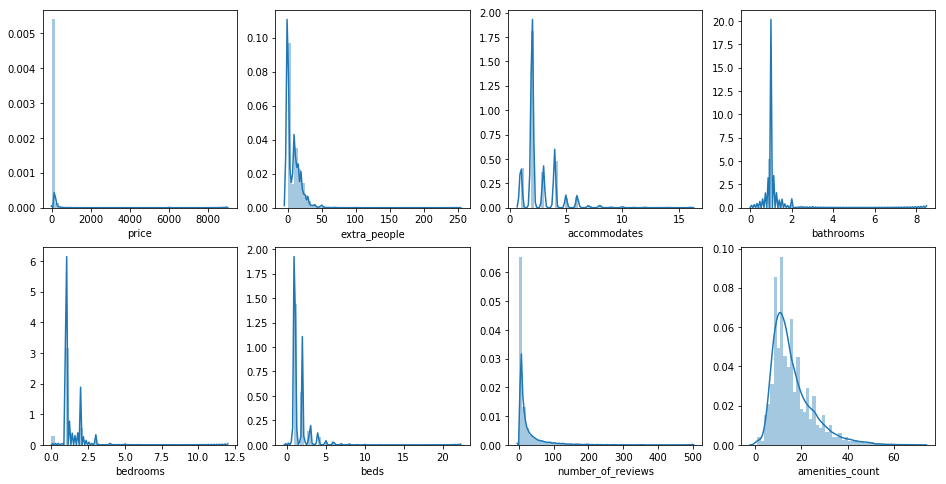

In [23]:
figs,axes=plt.subplots(2,4,figsize=(16,8))
sns.distplot(df['price'],ax=axes[0, 0])
sns.distplot(df['extra_people'],ax=axes[0, 1])
sns.distplot(df['accommodates'],ax=axes[0, 2])
sns.distplot(df['bathrooms'],ax=axes[0, 3])
sns.distplot(df['bedrooms'],ax=axes[1, 0])
sns.distplot(df['beds'],ax=axes[1, 1])
sns.distplot(df['number_of_reviews'],ax=axes[1, 2])
sns.distplot(df['amenities_count'],ax=axes[1, 3])

In [24]:
df=df[(df["price"] < df["price"].quantile(0.99)) & (df["number_of_reviews"] < df["number_of_reviews"].quantile(0.99))]

Text(0,0.5,'cancellation_policy')

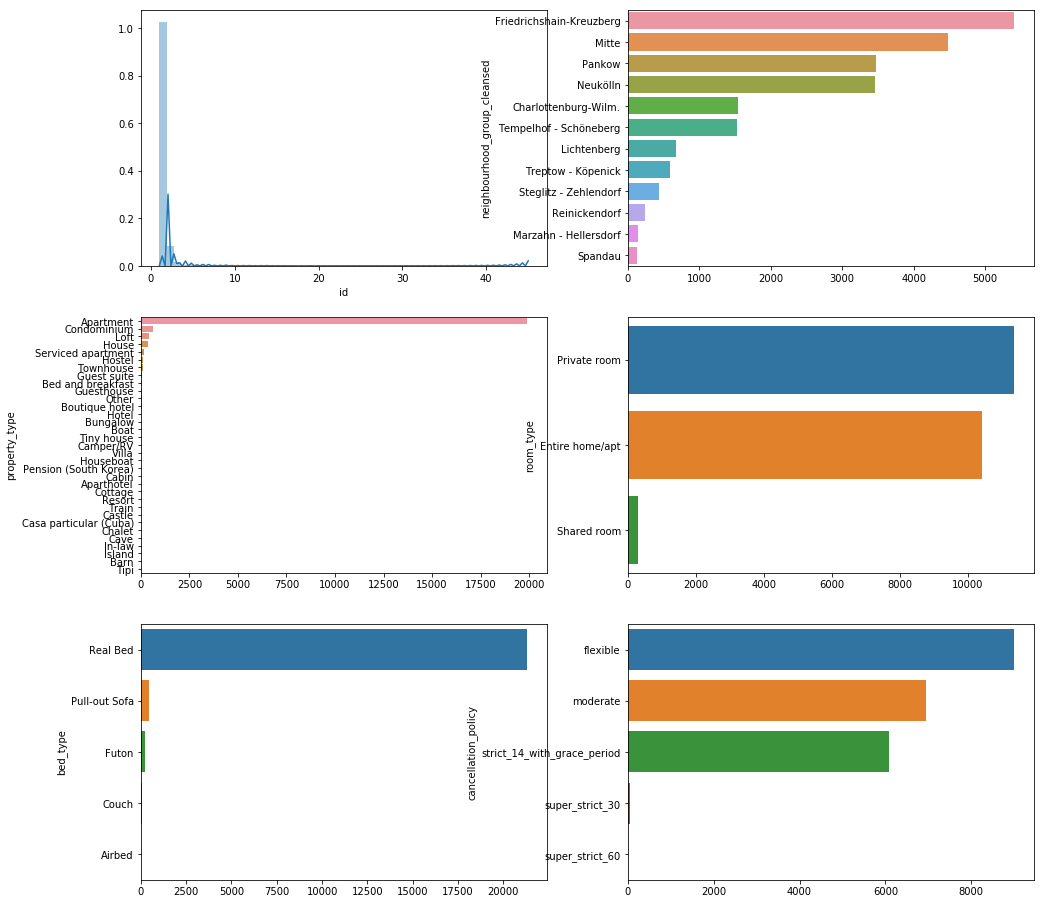

In [25]:
figs,axes=plt.subplots(3,2,figsize=(16,16))
sns.distplot(df.groupby(['host_id']).count()['id'].sort_values(),ax=axes[0, 0])
sns.barplot(y=df.groupby(['neighbourhood_group_cleansed']).count()['id'].sort_values(ascending=False).index,\
            x=df.groupby(['neighbourhood_group_cleansed']).count()['id'].sort_values(ascending=False).values,orient='h',ax=axes[0, 1])
plt.ylabel('neighbourhood_group_cleansed')
sns.barplot(y=df.groupby(['property_type']).count()['id'].sort_values(ascending=False).index,\
            x=df.groupby(['property_type']).count()['id'].sort_values(ascending=False).values,orient='h',ax=axes[1, 0])
plt.ylabel('property_type')
sns.barplot(y=df.groupby(['room_type']).count()['id'].sort_values(ascending=False).index,\
            x=df.groupby(['room_type']).count()['id'].sort_values(ascending=False).values,orient='h',ax=axes[1,1])
plt.ylabel('room_type')
sns.barplot(y=df.groupby(['bed_type']).count()['id'].sort_values(ascending=False).index,\
            x=df.groupby(['bed_type']).count()['id'].sort_values(ascending=False).values,orient='h',ax=axes[2,0])
plt.ylabel('bed_type')
sns.barplot(y=df.groupby(['cancellation_policy']).count()['id'].sort_values(ascending=False).index,\
            x=df.groupby(['cancellation_policy']).count()['id'].sort_values(ascending=False).values,orient='h',ax=axes[2,1])
plt.ylabel('cancellation_policy')


In [26]:
df=df.drop(['host_id'],axis=1)

In [27]:
print(df['neighbourhood_group_cleansed'].value_counts())
neighbourhood_group=pd.get_dummies(df['neighbourhood_group_cleansed'],prefix='neighbourhood_group_',drop_first=True)
df=pd.concat([df,neighbourhood_group],axis=1)
df=df.drop(['neighbourhood_group_cleansed'],axis=1)

Friedrichshain-Kreuzberg    5410
Mitte                       4481
Pankow                      3476
Neukölln                    3461
Charlottenburg-Wilm.        1543
Tempelhof - Schöneberg      1523
Lichtenberg                  679
Treptow - Köpenick           588
Steglitz - Zehlendorf        433
Reinickendorf                241
Marzahn - Hellersdorf        141
Spandau                      122
Name: neighbourhood_group_cleansed, dtype: int64


In [28]:
df['property_type'].value_counts()

Apartment                 19907
Condominium                 600
Loft                        433
House                       384
Serviced apartment          151
Hostel                      123
Townhouse                    93
Guest suite                  70
Bed and breakfast            61
Guesthouse                   55
Other                        44
Boutique hotel               34
Hotel                        31
Bungalow                     19
Boat                         14
Tiny house                   12
Camper/RV                    11
Villa                        10
Houseboat                     8
Pension (South Korea)         7
Cabin                         6
Aparthotel                    6
Cottage                       4
Resort                        3
Casa particular (Cuba)        2
Train                         2
Castle                        2
Barn                          1
In-law                        1
Island                        1
Chalet                        1
Tipi    

In [29]:
df['property_type_Apartment']=(df['property_type']=='Apartment')
df['property_type_Condominium']=(df['property_type']=='Condominium')
df['property_type_Loft']=(df['property_type']=='Loft')
df['property_type_House']=(df['property_type']=='House')
df=df.drop(['property_type'],axis=1)

In [30]:
print(df['room_type'].value_counts())
df['room_type_Private room']=(df['room_type']=='Private room')
df['room_type_Entire home/apt']=(df['room_type']=='Entire home/apt')
df=df.drop(['room_type'],axis=1)

Private room       11376
Entire home/apt    10429
Shared room          293
Name: room_type, dtype: int64


In [31]:
print(df['bed_type'].value_counts())
df['bed_type_Real Bed']=(df['bed_type']=='Real Bed')
df['bed_type_Pull-out Sofa']=(df['bed_type']=='Pull-out Sofa')
df=df.drop(['bed_type'],axis=1)

Real Bed         21328
Pull-out Sofa      439
Futon              239
Couch               69
Airbed              23
Name: bed_type, dtype: int64


In [32]:
# cancellation_policy
print(df['cancellation_policy'].value_counts())
df['cancellation_policy_flexible']=(df['cancellation_policy']=='flexible')
df['cancellation_policy_moderate']=(df['cancellation_policy']=='moderate')
df['cancellation_strict_14_with_grace_period']=(df['cancellation_policy']=='strict_14_with_grace_period')
df=df.drop(['cancellation_policy'],axis=1)

flexible                       9005
moderate                       6950
strict_14_with_grace_period    6086
super_strict_30                  48
super_strict_60                   9
Name: cancellation_policy, dtype: int64


In [33]:
# description_type
print(df['description_type'].value_counts())
description_type=pd.get_dummies(df['description_type'],prefix='description_type_',drop_first=True)
df=pd.concat([df,description_type],axis=1)
df=df.drop(['description_type'],axis=1)

0    6281
2    6083
3    4957
1    4777
Name: description_type, dtype: int64


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22098 entries, 0 to 22551
Data columns (total 57 columns):
id                                               22098 non-null int64
host_is_superhost                                22073 non-null float64
host_has_profile_pic                             22073 non-null float64
host_identity_verified                           22073 non-null float64
is_location_exact                                22098 non-null int64
accommodates                                     22098 non-null int64
bathrooms                                        22098 non-null float64
bedrooms                                         22098 non-null float64
beds                                             22098 non-null float64
price                                            22098 non-null float64
guests_included                                  22098 non-null int64
extra_people                                     22098 non-null float64
minimum_nights                     

In [35]:
df=df.fillna(0)

In [36]:
df.to_csv('dataframe.csv')

In [37]:
# Linear Regression

In [38]:
X=df.drop(['id','price'],axis=1)

In [39]:
y=df['price']

In [40]:
X.shape

(22098, 55)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr=LinearRegression()
ridge=Ridge()
lasso=Lasso()

In [43]:
alphas=np.power(10,3*np.random.random(20)-2) #generate alphas in [0.01,10]
alphas.sort()

In [44]:
lr_train=[]
lr_test=[]
ridge_train=[]
ridge_test=[]
lasso_train=[]
lasso_test=[]
for alpha in alphas:
    lr.fit(X_train,y_train)
    lr_train.append(lr.score(X_train,y_train))
    lr_test.append(lr.score(X_test,y_test))
    
    ridge.alpha=alpha
    ridge.fit(X_train,y_train)
    ridge_train.append(ridge.score(X_train,y_train))
    ridge_test.append(ridge.score(X_test,y_test))
    
    lasso.alpha=alpha
    lasso.fit(X_train,y_train)
    lasso_train.append(lasso.score(X_train,y_train))
    lasso_test.append(lasso.score(X_test,y_test))
    

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.240423e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.244710e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.246106e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.257199e-18
  overwrite_a=True).T
/anaconda3/lib/python3.6

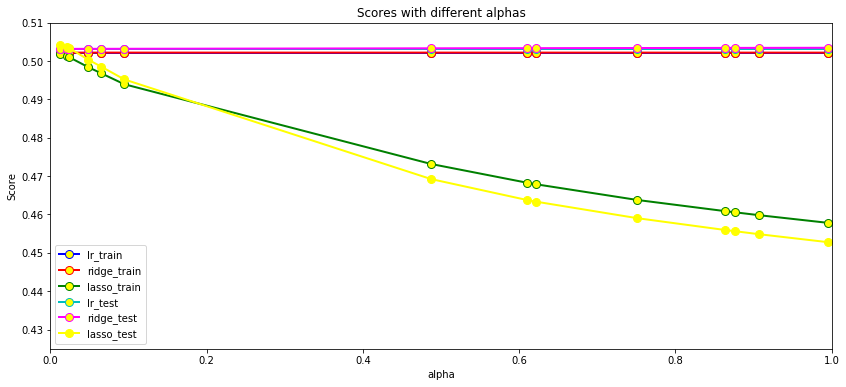

In [45]:
fig,ax = plt.subplots(figsize=(14,6)) #adjust figure size

ax.plot(alphas,lr_train,label='lr_train',color="blue", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")
ax.plot(alphas,ridge_train,label='ridge_train',color="red", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")
ax.plot(alphas,lasso_train,label='lasso_train',color="green", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")
ax.plot(alphas,lr_test,label='lr_test',color="c", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")
ax.plot(alphas,ridge_test,label='ridge_test',color="magenta", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")
ax.plot(alphas,lasso_test,label='lasso_test',color="yellow", lw=2, ls='-', marker='o', markersize=8,markerfacecolor="yellow")

ax.set_xlim([0, 1]) #adjust limit here to zoom in
ax.set_ylim([0.425, 0.51])
ax.set_xlabel('alpha')
ax.set_ylabel('Score')
ax.set_title('Scores with different alphas')
ax.legend()

In [46]:
lr.fit(X_train,y_train)
lr_results=pd.DataFrame(np.array([lr.coef_]),columns=X.columns)
lr_results

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,...,room_type_Private room,room_type_Entire home/apt,bed_type_Real Bed,bed_type_Pull-out Sofa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_strict_14_with_grace_period,description_type__1,description_type__2,description_type__3
0,2.451272,2.924888,-0.243824,-0.136174,6.776571,8.396741,10.069072,-1.188852,4.638142,0.017456,...,14.404806,35.336548,1.640613,1.126233,-2.668605,-1.80729,0.193899,-2.157726,-3.458734,-4.505634


In [47]:
lasso.alpha=0.2 #adjust alpha here to compare
lasso.fit(X_train,y_train)
lasso_results=pd.DataFrame(np.array([lasso.coef_]),columns=X.columns)
print(lasso.intercept_)
lasso_results

-2.9502940731858374


,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,...,room_type_Private room,room_type_Entire home/apt,bed_type_Real Bed,bed_type_Pull-out Sofa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_strict_14_with_grace_period,description_type__1,description_type__2,description_type__3
0,0.064294,0.0,0.0,0.0,6.753327,6.871132,9.148847,-0.625521,4.598689,0.022237,...,-0.0,21.084614,0.0,-0.0,-0.249725,-0.0,1.66018,-0.0,-1.62262,-2.334656


In [48]:
result_lasso=pd.Series(lasso.coef_, index=X.columns)
result_lasso[abs(result_lasso)>0.1].sort_values(ascending=False)

room_type_Entire home/apt                        21.084614
bedrooms                                          9.148847
bathrooms                                         6.871132
accommodates                                      6.753327
neighbourhood_group__Mitte                        5.854115
property_type_Loft                                4.999979
neighbourhood_group__Friedrichshain-Kreuzberg     4.843776
guests_included                                   4.598689
TV                                                3.861601
neighbourhood_group__Pankow                       3.453678
cancellation_strict_14_with_grace_period          1.660180
score                                             0.665528
amenities_count                                   0.372436
instant_bookable                                  0.185847
availability_30                                   0.155297
availability_60                                   0.142485
cancellation_policy_flexible                     -0.2497

Text(0.5,0,'lasso coefficients')

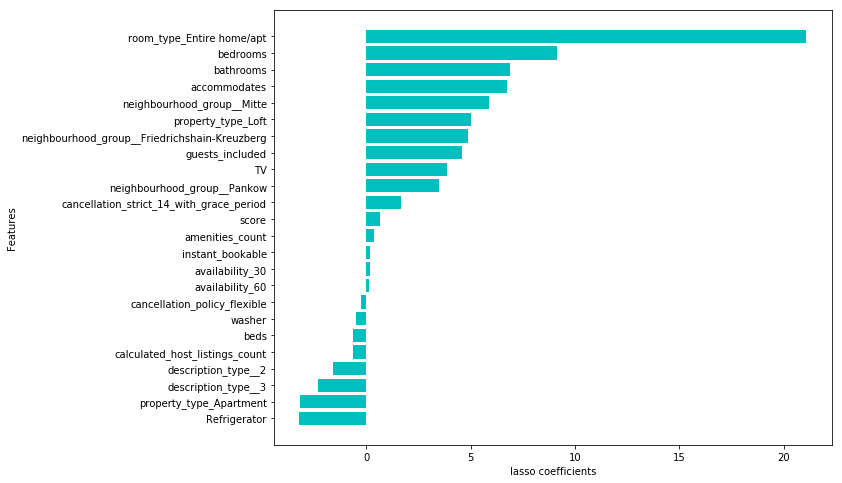

In [54]:
plt.figure(figsize=(10,8)) #adjust size to zoom in
plt.barh(np.arange(len(result_lasso[abs(result_lasso)>0.1])),result_lasso[abs(result_lasso)>0.1].sort_values().values,color='c')
plt.yticks(np.arange(len(result_lasso[abs(result_lasso)>0.1])), result_lasso[abs(result_lasso)>0.1].sort_values().index)
plt.ylabel('Features')
plt.xlabel('lasso coefficients')

In [55]:
ridge.alpha=0.2
ridge.fit(X_train,y_train)
ridge_results=pd.DataFrame(np.array([ridge.coef_]),columns=X.columns)
ridge_results

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,...,room_type_Private room,room_type_Entire home/apt,bed_type_Real Bed,bed_type_Pull-out Sofa,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_strict_14_with_grace_period,description_type__1,description_type__2,description_type__3
0,2.451244,2.912914,-0.244007,-0.136862,6.776597,8.396493,10.068906,-1.189314,4.638946,0.017404,...,14.356119,35.28584,1.639805,1.122501,-2.641686,-1.782333,0.219751,-2.156844,-3.459696,-4.506112


In [62]:
result_ridge=pd.Series(ridge.coef_, index=X.columns)
result_ridge[abs(result_ridge)>1].sort_values(ascending=False)

room_type_Entire home/apt                        35.285840
requires_license                                 25.658249
room_type_Private room                           14.356119
bedrooms                                         10.068906
bathrooms                                         8.396493
property_type_Loft                                7.560023
accommodates                                      6.776597
guests_included                                   4.638946
TV                                                4.501008
require_guest_phone_verification                  4.491171
neighbourhood_group__Mitte                        3.635388
host_has_profile_pic                              2.912914
host_is_superhost                                 2.451244
neighbourhood_group__Friedrichshain-Kreuzberg     2.324412
bed_type_Real Bed                                 1.639805
neighbourhood_group__Pankow                       1.429239
bed_type_Pull-out Sofa                            1.1225

Text(0.5,0,'Ridge coefficients')

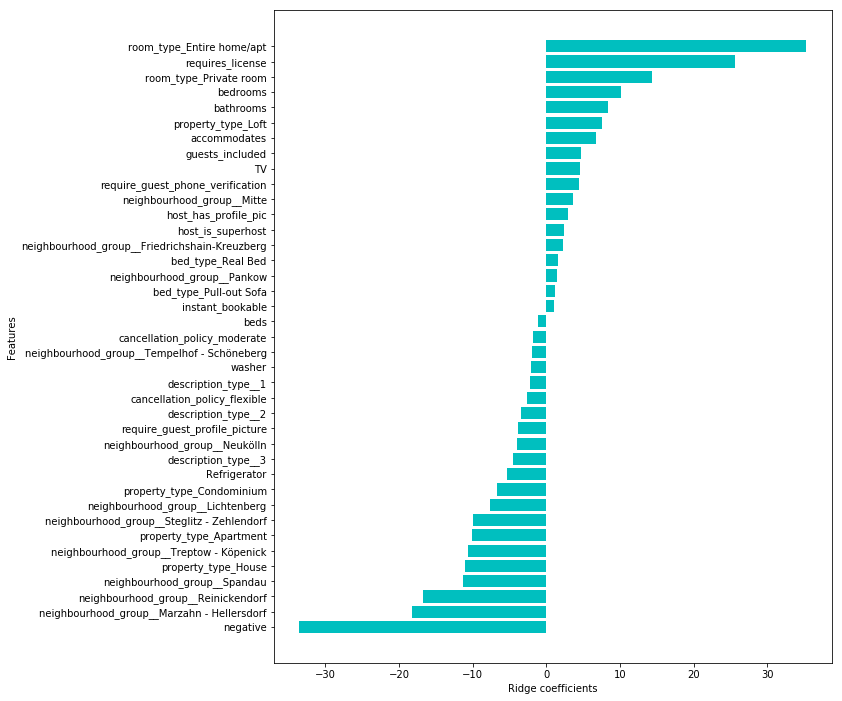

In [63]:
plt.figure(figsize=(10,12)) #adjust size to zoom in
plt.barh(np.arange(len(result_ridge[abs(result_ridge)>1])),result_ridge[abs(result_ridge)>1].sort_values().values,color='c')
plt.yticks(np.arange(len(result_ridge[abs(result_ridge)>1])), result_ridge[abs(result_ridge)>1].sort_values().index)
plt.ylabel('Features')
plt.xlabel('Ridge coefficients')